<a href="https://colab.research.google.com/github/ElisabethShah/DS-Unit-2-Applied-Modeling/blob/master/module2-gradient-boosting/Gradient%20Boosting%20Assignment%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science — Applied Modeling_ 

This sprint, your project is Caterpillar Tube Pricing: Predict the prices suppliers will quote for industrial tube assemblies.

# Gradient Boosting

## Overview

### Objectives
- Do feature engineering with relational data
- Use xgboost for gradient boosting

### Python libraries for Gradient Boosting
- [scikit-learn Gradient Tree Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting) — slower than other libraries, but [the new version may be better](https://twitter.com/amuellerml/status/1129443826945396737)
  - Anaconda: already installed
  - Google Colab: already installed
- [xgboost](https://xgboost.readthedocs.io/en/latest/) — can accept missing values and enforce [monotonic constraints](https://xiaoxiaowang87.github.io/monotonicity_constraint/)
  - Anaconda, Mac/Linux: `conda install -c conda-forge xgboost`
  - Windows: `conda install -c anaconda py-xgboost`
  - Google Colab: already installed
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/) — can accept missing values and enforce [monotonic constraints](https://blog.datadive.net/monotonicity-constraints-in-machine-learning/)
  - Anaconda: `conda install -c conda-forge lightgbm`
  - Google Colab: already installed
- [CatBoost](https://catboost.ai/) — can accept missing values and use [categorical features](https://catboost.ai/docs/concepts/algorithm-main-stages_cat-to-numberic.html) without preprocessing
  - Anaconda: `conda install -c conda-forge catboost`
  - Google Colab: `pip install catboost`

### Understand the difference between boosting & bagging

Boosting (used by Gradient Boosting) is different than Bagging (used by Random Forests). 

[_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8.2.3, Boosting:

>Recall that bagging involves creating multiple copies of the original training data set using the bootstrap, fitting a separate decision tree to each copy, and then combining all of the trees in order to create a single predictive model.

>**Boosting works in a similar way, except that the trees are grown _sequentially_: each tree is grown using information from previously grown trees.**

>Unlike fitting a single large decision tree to the data, which amounts to _fitting the data hard_ and potentially overfitting, the boosting approach instead _learns slowly._ Given the current model, we fit a decision tree to the residuals from the model.

>We then add this new decision tree into the fitted function in order to update the residuals. Each of these trees can be rather small, with just a few terminal nodes. **By fitting small trees to the residuals, we slowly improve fˆ in areas where it does not perform well.**

>Note that in boosting, unlike in bagging, the construction of each tree depends strongly on the trees that have already been grown.

### Get data

#### Option 1. Kaggle web UI
 
Sign in to Kaggle and go to the [Caterpillar Tube Pricing](https://www.kaggle.com/c/caterpillar-tube-pricing) competition. Go to the Data page. After you have accepted the rules of the competition, use the download buttons to download the data.

#### Option 2. Kaggle API

Follow these [instructions](https://github.com/Kaggle/kaggle-api).

#### Option 3. GitHub Repo — LOCAL

If you are working locally:

1. Clone the [GitHub repo](https://github.com/LambdaSchool/DS-Unit-2-Applied-Modeling/tree/master/data/caterpillar) locally. The data is in the repo, so you don't need to download it separately.

2. Unzip the file `caterpillar-tube-pricing.zip` which is in the data folder of your local repo.

3. Unzip the file `data.zip`. 

4. Run the cell below to assign a constant named `SOURCE`, a string that points to the location of the data on your local machine. The rest of the code in the notebook will use this constant.

#### Option 4. GitHub Repo — COLAB

If you are working on Google Colab, uncomment and run these cells, to download the data, unzip it, and assign a constant that points to the location of the data.

In [1]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/caterpillar/caterpillar-tube-pricing.zip

--2019-08-14 21:01:45--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/caterpillar/caterpillar-tube-pricing.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 823789 (804K) [application/zip]
Saving to: ‘caterpillar-tube-pricing.zip.1’

caterpillar-tube-pr 100%[===================>] 804.48K  --.-KB/s    in 0.06s   

2019-08-14 21:01:45 (12.2 MB/s) - ‘caterpillar-tube-pricing.zip.1’ saved [823789/823789]



In [2]:
!unzip -o caterpillar-tube-pricing.zip

Archive:  caterpillar-tube-pricing.zip
  inflating: sample_submission.csv   
  inflating: data.zip                


In [3]:
!unzip -o data.zip

Archive:  data.zip
  inflating: competition_data/bill_of_materials.csv  
  inflating: competition_data/comp_adaptor.csv  
  inflating: competition_data/comp_boss.csv  
  inflating: competition_data/comp_elbow.csv  
  inflating: competition_data/comp_float.csv  
  inflating: competition_data/comp_hfl.csv  
  inflating: competition_data/comp_nut.csv  
  inflating: competition_data/comp_other.csv  
  inflating: competition_data/comp_sleeve.csv  
  inflating: competition_data/comp_straight.csv  
  inflating: competition_data/comp_tee.csv  
  inflating: competition_data/comp_threaded.csv  
  inflating: competition_data/components.csv  
  inflating: competition_data/specs.csv  
  inflating: competition_data/test_set.csv  
  inflating: competition_data/train_set.csv  
  inflating: competition_data/tube.csv  
  inflating: competition_data/tube_end_form.csv  
  inflating: competition_data/type_component.csv  
  inflating: competition_data/type_connection.csv  
  inflating: competition_data/type

In [0]:
SOURCE = 'competition_data/'

## Assignment

- Continue to participate in the [Kaggle Caterpillar competition](https://www.kaggle.com/c/caterpillar-tube-pricing).
- Do more feature engineering. 
- Use xgboost for gradient boosting.
- Submit new predictions.
- Commit your notebook to your fork of the GitHub repo.

In [5]:
!pip install catboost

In [6]:
!pip install category-encoders

In [0]:
import category_encoders as ce
import lightgbm as lgbm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from catboost import CatBoostRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from xgboost import XGBRegressor

%matplotlib inline

In [0]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmsle(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(y_true, y_pred))

### Import and merge materials and components tables

In [9]:
materials = pd.read_csv(SOURCE + 'bill_of_materials.csv')
materials.head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
materials.describe(include='all')

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
count,21198,19149,19149.000000,14786,14786.000000,4791,4798.000000,607,608.000000,92,92.000000,26,26.000000,7,7.0,1,1.0
unique,21198,1079,NaN,834,NaN,509,NaN,204,NaN,62,NaN,19,NaN,4,NaN,1,NaN
top,TA-20091,C-1621,NaN,C-1628,NaN,C-1641,NaN,C-1660,NaN,C-0872,NaN,C-0923,NaN,C-1019,NaN,C-1981,NaN
freq,1,2043,NaN,1959,NaN,421,NaN,62,NaN,10,NaN,3,NaN,3,NaN,1,NaN
mean,NaN,NaN,1.559873,NaN,1.526106,NaN,1.020634,NaN,1.027961,NaN,1.032609,NaN,1.153846,NaN,1.0,NaN,1.0
std,NaN,NaN,0.507444,NaN,0.510851,NaN,0.160100,NaN,0.209041,NaN,0.178583,NaN,0.367946,NaN,0.0,NaN,NaN
min,NaN,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.0,NaN,1.0
25%,NaN,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.0,NaN,1.0
50%,NaN,NaN,2.000000,NaN,2.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.0,NaN,1.0
75%,NaN,NaN,2.000000,NaN,2.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.0,NaN,1.0


In [11]:
components = pd.read_csv(SOURCE + 'components.csv')
components.head()

,component_id,name,component_type_id
0,9999,OTHER,OTHER
1,C-0001,SLEEVE,CP-024
2,C-0002,SLEEVE,CP-024
3,C-0003,SLEEVE-FLARED,CP-024
4,C-0004,NUT,CP-026


In [12]:
components.describe(include='all')

,component_id,name,component_type_id
count,2048,2047,2048
unique,2048,297,29
top,C-1180,FLANGE,OTHER
freq,1,350,1006


In [0]:
# Highly inefficient - use melt + merge instead.
for index, row in components.iterrows():
  materials = materials.replace(row['component_id'], row['component_type_id'])

In [14]:
materials.head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,CP-025,2.0,CP-024,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,CP-028,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,CP-028,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,CP-028,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,CP-025,1.0,CP-024,1.0,CP-014,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
materials.describe(include='all')

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
count,21198,19149,19149.000000,14786,14786.000000,4791,4798.000000,607,608.000000,92,92.000000,26,26.000000,7,7.0,1,1.0
unique,21198,26,NaN,25,NaN,27,NaN,19,NaN,12,NaN,6,NaN,1,NaN,1,NaN
top,TA-20091,CP-025,NaN,CP-024,NaN,CP-014,NaN,CP-024,NaN,OTHER,NaN,OTHER,NaN,OTHER,NaN,OTHER,NaN
freq,1,8542,NaN,10670,NaN,2899,NaN,256,NaN,54,NaN,19,NaN,7,NaN,1,NaN
mean,NaN,NaN,1.559873,NaN,1.526106,NaN,1.020634,NaN,1.027961,NaN,1.032609,NaN,1.153846,NaN,1.0,NaN,1.0
std,NaN,NaN,0.507444,NaN,0.510851,NaN,0.160100,NaN,0.209041,NaN,0.178583,NaN,0.367946,NaN,0.0,NaN,NaN
min,NaN,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.0,NaN,1.0
25%,NaN,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.0,NaN,1.0
50%,NaN,NaN,2.000000,NaN,2.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.0,NaN,1.0
75%,NaN,NaN,2.000000,NaN,2.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.0,NaN,1.0


In [0]:
columns = ['component_id_' + str(i+1) for i in range(8)]
quantities = ['quantity_' + str(i+1) for i in range(8)]

In [0]:
materials_wide = materials.pivot(index='tube_assembly_id', 
                                 columns=columns[0], 
                                 values=quantities[0])

In [18]:
materials_wide.head()

component_id_1,nan,CP-001,CP-002,CP-003,CP-004,CP-005,CP-006,CP-007,CP-008,CP-009,CP-010,CP-011,CP-012,CP-014,CP-015,CP-016,CP-018,CP-019,CP-020,CP-021,CP-022,CP-024,CP-025,CP-026,CP-027,CP-028,OTHER
tube_assembly_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
TA-00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
TA-00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
TA-00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
TA-00004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
TA-00005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [0]:
for column, quantity in zip(columns[1::], quantities[1::]):
  materials_wide = materials_wide.add(materials.pivot(index='tube_assembly_id', 
                                                      columns=column, 
                                                      values=quantity), 
                                     fill_value=0)

In [20]:
materials_wide.head()

,nan,CP-001,CP-002,CP-003,CP-004,CP-005,CP-006,CP-007,CP-008,CP-009,CP-010,CP-011,CP-012,CP-014,CP-015,CP-016,CP-017,CP-018,CP-019,CP-020,CP-021,CP-022,CP-023,CP-024,CP-025,CP-026,CP-027,CP-028,CP-029,OTHER
tube_assembly_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TA-00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
TA-00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
TA-00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
TA-00004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
TA-00005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [0]:
materials_wide['total_components'] = materials_wide.sum(axis=1)

In [0]:
materials_wide['distinct_components'] = (~materials_wide.isnull()).sum(axis=1) - 1

In [23]:
materials_wide.head().T

tube_assembly_id,TA-00001,TA-00002,TA-00003,TA-00004,TA-00005
NaN,NaN,NaN,NaN,NaN,NaN
CP-001,NaN,NaN,NaN,NaN,NaN
CP-002,NaN,NaN,NaN,NaN,NaN
CP-003,NaN,NaN,NaN,NaN,NaN
CP-004,NaN,NaN,NaN,NaN,NaN
CP-005,NaN,NaN,NaN,NaN,NaN
CP-006,NaN,NaN,NaN,NaN,NaN
CP-007,NaN,NaN,NaN,NaN,NaN
CP-008,NaN,NaN,NaN,NaN,NaN
CP-009,NaN,NaN,NaN,NaN,NaN


In [0]:
materials_wide = materials_wide.fillna(0)

### Import tube data

In [0]:
tube = pd.read_csv(SOURCE + 'tube.csv')

In [26]:
tube.head()

,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,TA-00001,SP-0035,12.70,1.65,164.0,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1,TA-00002,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,TA-00003,SP-0019,6.35,0.71,127.0,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,TA-00004,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,TA-00005,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0


### Wrangle data

In [0]:
def wrangle(X):
    X = X.copy()
    
    # Engineer date features
    X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
    X['quote_date_year'] = X['quote_date'].dt.year
    X['quote_date_month'] = X['quote_date'].dt.month
    X = X.drop(columns='quote_date')
    
    # Merge tube data
    X = X.merge(tube, how='left')
    
    # Merge selected features from bill_of_materials
    # Just use the first component_id, ignore the others for now!
    X = X.merge(materials_wide, how='left', left_on='tube_assembly_id', 
                right_index=True)
    
    # Count the number of specs for the tube assembly
    specs = pd.read_csv(SOURCE + 'specs.csv')
    specs['specs_total'] = specs.drop(columns=['tube_assembly_id']).count(axis=1)
    features = ['tube_assembly_id', 'specs_total', 'spec1']
    X = X.merge(specs[features], how='left')
    
    # Drop tube_assembly_id because our goal is to predict unknown assemblies
    X = X.drop(columns='tube_assembly_id')
    
    return X

In [0]:
# Read data
trainval = pd.read_csv(SOURCE + 'train_set.csv')
test = pd.read_csv(SOURCE + 'test_set.csv')

# Split into train & validation sets
# All rows for a given tube_assembly_id should go in either train or validation
trainval_tube_assemblies = trainval['tube_assembly_id'].unique()

train_tube_assemblies, val_tube_assemblies = train_test_split(
    trainval_tube_assemblies, random_state=42)

train = trainval[trainval['tube_assembly_id'].isin(train_tube_assemblies)]
val = trainval[trainval['tube_assembly_id'].isin(val_tube_assemblies)]

# Wrangle train, validation, and test sets
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

# Arrange X matrix and y vector (log-transformed)
target = 'cost'
X_train = train.drop(columns=target)
X_val = val.drop(columns=target)
X_test = test.drop(columns='id')

y_train = train[target]
y_val = val[target]

y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [29]:
# Make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit
pipeline.fit(X_train, y_train_log)

# Validate
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

# Predict
def generate_submission(estimator, X_test, filename):
    y_pred_log = estimator.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # Convert from log-dollars to dollars
    submission = pd.read_csv(SOURCE + '../sample_submission.csv')
    submission['cost'] = y_pred
    submission.to_csv(filename, index=False)
    
generate_submission(pipeline, X_test, 'submission.csv')

Validation Error 0.27424121617389124


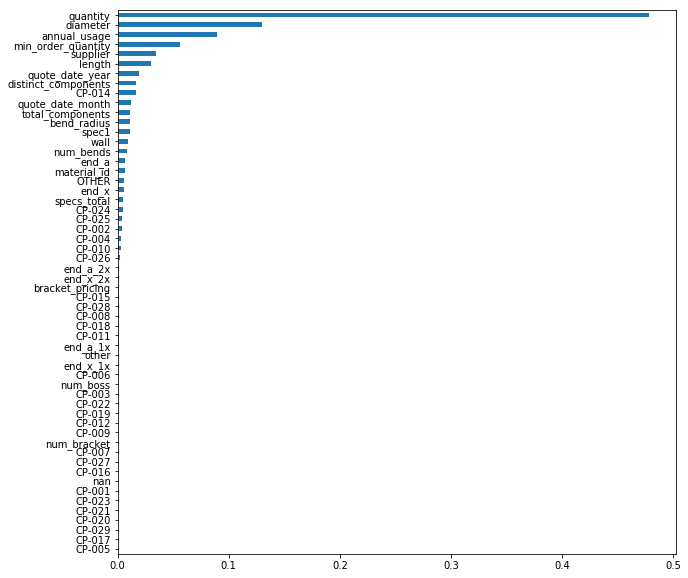

In [30]:
rf = pipeline.named_steps['randomforestregressor']
plt.figure(figsize=(10,10))
importances = pd.Series(rf.feature_importances_, X_train.columns)
importances.sort_values().plot.barh();

### Use xgboost for gradient boosting

**[XGBoost Python API Reference: Scikit-Learn API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)**

In [31]:
# Make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=1000, n_job=-1)
)

# Fit
pipeline.fit(X_train, y_train_log)

# Validate
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:03:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation Error 0.2599250370175995


In [0]:
generate_submission(pipeline, X_test, 'submission_xgb_1000.csv')

#### Jason Brownlee, [Avoid Overfitting By Early Stopping With XGBoost In Python](https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/)

In [0]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

In [0]:
eval_set = [
    (X_train_encoded, y_train_log),
    (X_val_encoded, y_val_log)
]

In [35]:
model = XGBRegressor(n_estimators=1000, n_job=-1)

model.fit(X_train_encoded, 
          y_train_log, 
          eval_set=eval_set,
          eval_metric='rmse',
          early_stopping_rounds=10
         )

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:04:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.71924	validation_1-rmse:1.70846
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.56516	validation_1-rmse:1.55498
[2]	validation_0-rmse:1.42789	validation_1-rmse:1.41819
[3]	validation_0-rmse:1.30352	validation_1-rmse:1.29412
[4]	validation_0-rmse:1.19193	validation_1-rmse:1.18275
[5]	validation_0-rmse:1.0937	validation_1-rmse:1.08509
[6]	validation_0-rmse:1.00581	validation_1-rmse:0.997525
[7]	validation_0-rmse:0.928813	validation_1-rmse:0.920942
[8]	validation_0-rmse:0.861621	validation_1-rmse:0.854404
[9]	validation_0-rmse:0.80164	validation_1-rmse:0.795111
[10]	validation_0-rmse:0.74787	validation_1-rmse:0.741991
[11]	validation_0-rmse:0.702512	validation_1-rmse:0.697544
[12]	validation_0-rmse:0.661513	

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_job=-1, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

(0.2, 0.4)

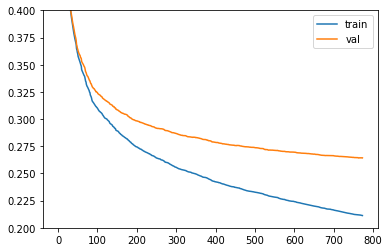

In [36]:
results = model.evals_result()

train_rmse = results['validation_0']['rmse']
val_rmse = results['validation_1']['rmse']

epochs = range(0, len(train_rmse))

plt.plot(epochs, train_rmse, label='train')
plt.plot(epochs, val_rmse, label='val')
plt.legend();
plt.ylim(0.2, 0.4)

### Use catboost for gradient boosting

In [37]:
# Make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    CatBoostRegressor(learning_rate=0.3)
)

# Fit
pipeline.fit(X_train, y_train_log)

# Validate
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

0:	learn: 1.7004556	total: 82.4ms	remaining: 1m 22s
1:	learn: 1.2638261	total: 114ms	remaining: 56.8s
2:	learn: 0.9524158	total: 146ms	remaining: 48.6s
3:	learn: 0.7481987	total: 177ms	remaining: 44s
4:	learn: 0.6201984	total: 207ms	remaining: 41.2s
5:	learn: 0.5326236	total: 239ms	remaining: 39.6s
6:	learn: 0.4659509	total: 270ms	remaining: 38.3s
7:	learn: 0.4259401	total: 313ms	remaining: 38.9s
8:	learn: 0.4038331	total: 348ms	remaining: 38.3s
9:	learn: 0.3924723	total: 378ms	remaining: 37.4s
10:	learn: 0.3823118	total: 408ms	remaining: 36.7s
11:	learn: 0.3768992	total: 436ms	remaining: 35.9s
12:	learn: 0.3641407	total: 469ms	remaining: 35.6s
13:	learn: 0.3492600	total: 501ms	remaining: 35.3s
14:	learn: 0.3471898	total: 539ms	remaining: 35.4s
15:	learn: 0.3444175	total: 569ms	remaining: 35s
16:	learn: 0.3397657	total: 601ms	remaining: 34.8s
17:	learn: 0.3335009	total: 631ms	remaining: 34.4s
18:	learn: 0.3313642	total: 661ms	remaining: 34.1s
19:	learn: 0.3278218	total: 693ms	remaining

### Use LightGBM for gradient boosting

In [38]:
# Make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    lgbm.sklearn.LGBMRegressor(learning_rate=0.2)
)

# Fit
pipeline.fit(X_train, y_train_log)

# Validate
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

Validation Error 0.24985887798999143


## Stretch Goals

- Improve your scores on Kaggle.
- Make visualizations and share on Slack.
- Look at [Kaggle Kernels](https://www.kaggle.com/c/caterpillar-tube-pricing/kernels) for ideas about feature engineerng and visualization.
- Look at the bonus notebook in the repo, about Monotonic Constraints with Gradient Boosting.
- Read more about gradient boosting:
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - [Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (3 minute video)